<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Vannskade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vise vannskadedata fra Innsikt for ulike skadeårsaker 

## Importere nødvendige biblioteker


In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lese filer lagret lokalt

In [148]:
from google.colab import files
uploaded = files.upload()

Saving naturskade_ikke_pool.xlsx to naturskade_ikke_pool (1).xlsx
Saving vannskade_frost.xlsx to vannskade_frost (1).xlsx
Saving vannskade_kjent.xlsx to vannskade_kjent.xlsx
Saving vannskade_lekkasje.xlsx to vannskade_lekkasje.xlsx
Saving vannskade_tilstopping.xlsx to vannskade_tilstopping (1).xlsx
Saving vannskade_ukjent.xlsx to vannskade_ukjent.xlsx
Saving vannskade_vanninntregning.xlsx to vannskade_vanninntregning (1).xlsx


## Enkel lineær regresjon

In [150]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

## Hente data fra importerte filer

In [211]:
navn = ['år','mnd','skade']
år = np.arange(2000,2030,1)

frost = pd.read_excel('vannskade_frost.xlsx',header=None,skiprows=3,names=navn)
tilstopp = pd.read_excel('vannskade_tilstopping.xlsx',header=None,skiprows=3,names=navn)
intre = pd.read_excel('vannskade_vanninntregning.xlsx',header=None,skiprows=3,names=navn)
nat = pd.read_excel('naturskade_ikke_pool.xlsx',header=None,skiprows=3,names=navn)

data_frost = []; data_til = []; data_inn = []; data_nat = [];

for i in år[:-9]:
  frost1 = frost.loc[frost['år']==i,'skade'].sum()
  tilstopp1 = tilstopp.loc[tilstopp['år']==i,'skade'].sum()
  intre1 = intre.loc[intre['år']==i,'skade'].sum()
  nat1 = nat.loc[nat['år']==i,'skade'].sum()
  data_frost.append(frost1)
  data_til.append(tilstopp1)
  data_inn.append(intre1)
  data_nat.append(nat1)
#løse problem med aksenavn, multipliser alle verdier med faktor
new_frost = np.array([i*(10**(-6)) for i in data_frost])
new_til = np.array([i*(10**(-6)) for i in data_til])
new_inn = np.array([i*(10**(-6)) for i in data_inn])
new_nat = np.array([i*(10**(-6)) for i in data_nat])

## Plotte data

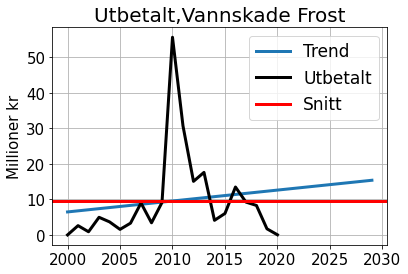

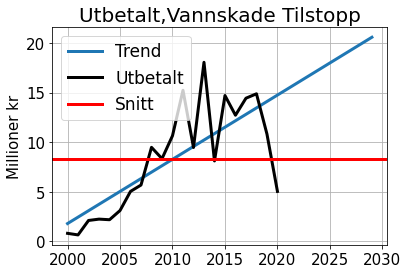

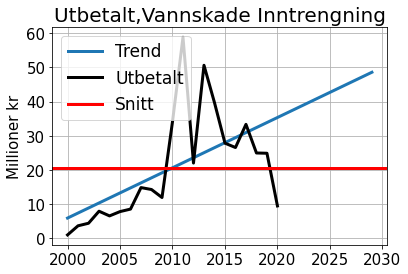

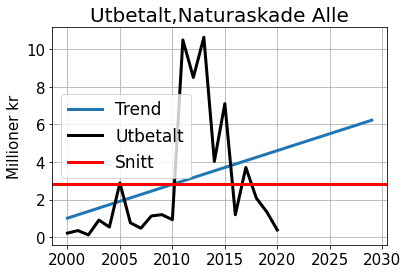

In [212]:
data_alle = np.array([data_frost,data_til,data_inn,data_nat])#.astype(np.float)
data_new = np.array([new_frost,new_til,new_inn,new_nat])
tit = np.array(['Vannskade Frost','Vannskade Tilstopp','Vannskade Inntrengning',
                'Naturaskade Alle'])
from matplotlib.ticker import ScalarFormatter
grid = np.array([0,1,2,3])
fig, ax = plt.subplots()#, figsize=(10,10))
bins = np.linspace(0,50,10)
for i,j in zip(data_new,tit):

  snitt = np.mean(i)
  a,b = linreg(range(len(i)),i)  #//x=skade
  trendline=[a*index + b for index in range(len(år))]
  plt.plot(år,trendline,label="Trend",linewidth=3)
  plt.plot(år[:-9],i,label="Utbetalt",color='k',linewidth=3)
  plt.axhline(y=snitt,color='r',label='Snitt',linewidth=3)
  plt.title("Utbetalt,"+str(j),size=20)
  plt.ylabel("Millioner kr",size=15)
  ax = plt.gca()
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  plt.grid(),plt.legend()
  
  #from google.colab import files
  #plt.savefig("vannskade"+str(j)+".png")
  #files.download("vannskade"+str(j)+".png")
  plt.show()

## Enkelt kakediagram for vannskader

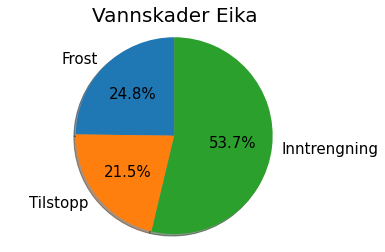

In [213]:
snitt1 = np.mean(data_frost); snitt2 = np.mean(data_til)
snitt3 = np.mean(data_inn); snitt4 = np.mean(data_nat)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frost', 'Tilstopp', 'Inntrengning'#, 'Nat.skade ikke pool'
sizes = [snitt1,snitt2,snitt3]#,snitt4]
explode = (0, 0, 0)#, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, 
        startangle=90,textprops={'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Vannskader Eika',size=20)
  
#from google.colab import files
#plt.savefig("vannskade_kake.png")
#files.download("vannskade_kake.png")
plt.show()

## Barplot for å sjekke totale vannskader vs. værrelaterte mot FinansNorges tall

In [214]:
lek = pd.read_excel('vannskade_lekkasje.xlsx',header=None,skiprows=3,names=navn)
kjent = pd.read_excel('vannskade_kjent.xlsx',header=None,skiprows=3,names=navn)
ukjent= pd.read_excel('vannskade_ukjent.xlsx',header=None,skiprows=3,names=navn)

data_lek = []; data_kjent = []; data_ukjent = [];

for i in år[:-9]:
  lek1 = lek.loc[lek['år']==i,'skade'].sum()
  kjent1 = kjent.loc[kjent['år']==i,'skade'].sum()
  ukjent1 = ukjent.loc[ukjent['år']==i,'skade'].sum()
  data_lek.append(lek1)
  data_kjent.append(kjent1)
  data_ukjent.append(ukjent1)
#løse problem med aksenavn, multipliser alle verdier med faktor
new_lek = np.array([i*(10**(-6)) for i in data_lek])
new_kjent = np.array([i*(10**(-6)) for i in data_kjent])
new_ukjent = np.array([i*(10**(-6)) for i in data_ukjent])


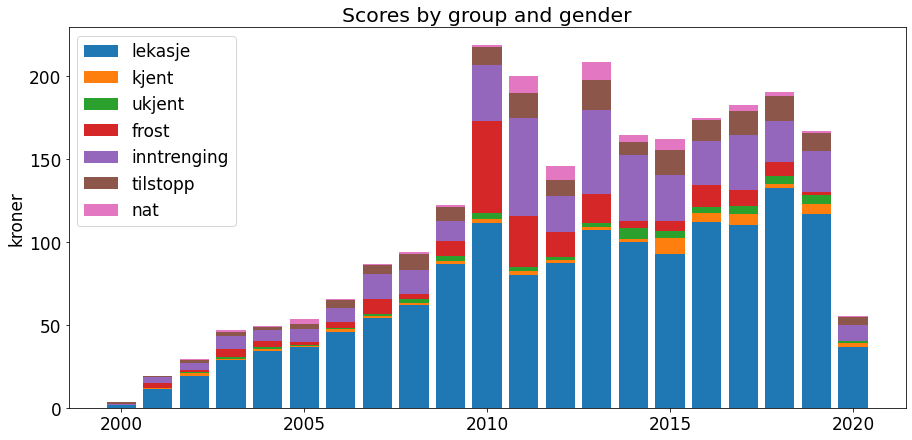

In [215]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(år[:-9], new_lek, label='lekasje')
ax.bar(år[:-9], new_kjent,bottom=new_lek, label='kjent')
ax.bar(år[:-9], new_ukjent, bottom= new_lek+new_kjent, label='ukjent')
ax.bar(år[:-9], new_frost, bottom=new_lek+new_kjent+new_ukjent, label='frost')
ax.bar(år[:-9], new_inn,bottom=new_lek+new_kjent+new_ukjent+new_frost, label='inntrenging')
ax.bar(år[:-9], new_til, bottom=new_lek+new_kjent+new_ukjent+new_frost+new_inn, label='tilstopp')
ax.bar(år[:-9], new_nat, bottom=new_lek+new_kjent+new_ukjent+new_frost+new_inn+new_til, label='nat')

ax.set_ylabel('millioner kr')
ax.set_title('Fordeling vannskader')
ax.legend() ;plt.show()

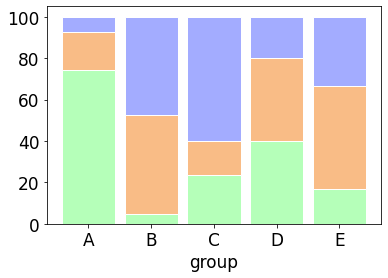

In [216]:
# Data
#r = [0,1,2,3,4]
#raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
raw_data = {'frost':new_frost,'tilstopp':new_til,'inntrengning':new_inn,
            'nat':new_nat,'ukjent':new_ukjent,'kjent':new_kjent,'lekkasje':new_lek}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [a+b+c+d+e+f+g for a,b,c,d,e,f,g in zip(df['frost'], df['tilstopp'], df['inntrengning'], df['nat'], df['ukjent'], df['kjent'], df['lekkasje'])]
greenBars = [a / b * 100 for a,b in zip(df['frost'], totals)]
orangeBars = [a / b * 100 for a,b in zip(df['tilstopp'], totals)]
blueBars = [a / b * 100 for a,b in zip(df['inntrengning'], totals)]
redbBars = [a / b * 100 for a,b in zip(df['nat'], totals)]
blackBars = [a / b * 100 for a,b in zip(df['ukjent'], totals)]
orangeBars = [a / b * 100 for a,b in zip(df['kjent'], totals)]
yellowBars = [a / b * 100 for a,b in zip(df['lekkasje'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
plt.bar(r, redBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
plt.bar(r, blackBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
plt.bar(r, orangeBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
plt.bar(r, yellowBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()
